In [ ]:
!python -m spacy download es_core_news_lg -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.0/568.0 MB 3.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
from spacy import displacy
from bs4 import BeautifulSoup
import requests
import re
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import nltk
from nltk.corpus import stopwords
import re
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
url="https://es.wikipedia.org/wiki/Aprendizaje_autom%C3%A1tico_en_videojuegos"

In [ ]:
content= requests.get(url).text

In [ ]:
soup=BeautifulSoup(content, "html.parser")
print(soup.title.string)

Aprendizaje automático en videojuegos - Wikipedia, la enciclopedia libre


In [ ]:
print(soup)

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" dir="ltr" lang="es">
<head>
<meta charset="utf-8"/>
<title>Aprendizaje automático en videojuegos - Wikipedia, la enciclopedia libre</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-f

# CASO 1

In [ ]:
nltk.download('stopwords')
stopword_es=stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def limpiar_texto(texto):

  black_list=[""]

  texto_min=texto.lower()

  texto_sin_puntuacion=re.sub(r'[^\w\s]','',texto_min)

  texto_sin_numeros=re.sub(r'\d+','',texto_sin_puntuacion)

  lista_de_palabras=texto_sin_numeros.split()

  lista_de_palabras_limpias=[palabra for palabra in lista_de_palabras if palabra not in stopword_es]

  return " ".join(lista_de_palabras_limpias)


In [ ]:
soup1= soup.get_text()
tex_lim=limpiar_texto(soup1)

In [ ]:
worldcloud=WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(tex_lim)

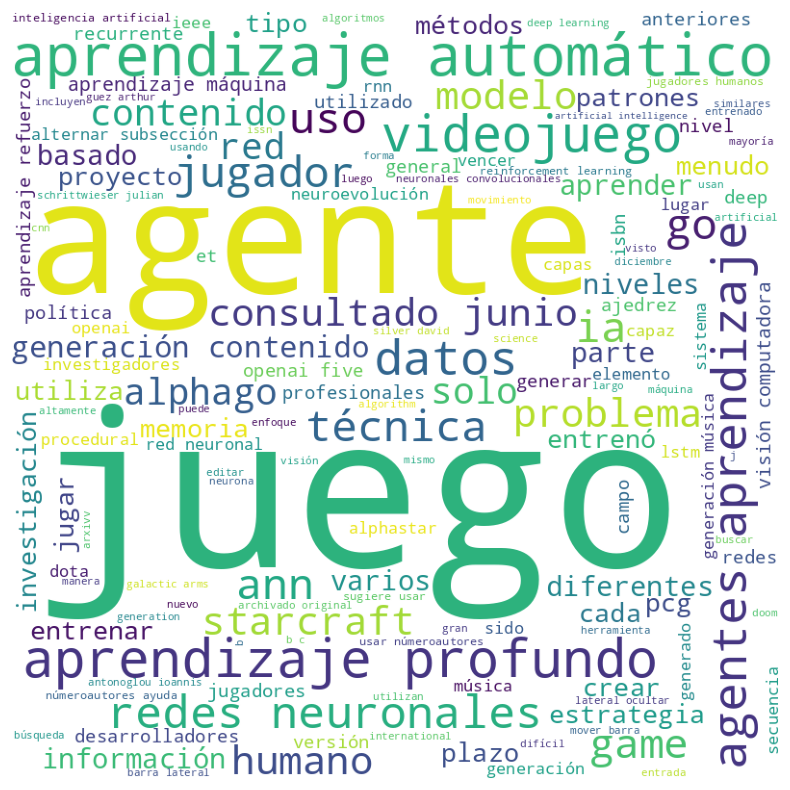

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(worldcloud)
plt.axis("off")
plt.show()

# CASO 2

In [ ]:
nlp=spacy.load("es_core_news_lg")
import es_core_news_lg
nlp=es_core_news_lg.load()


In [ ]:
doc=nlp(tex_lim)

In [ ]:
palabras_clave=[]

In [ ]:
for token in doc:
  if token.is_alpha and not token.is_stop:
    palabras_clave.append(token.lemma_.lower())
print(palabras_clave[:5])

['aprendizaje', 'automático', 'videojuegos', 'wikipedia', 'enciclopedia']


In [ ]:
frecuencia_palabras=Counter(palabras_clave)

In [ ]:
N=15
frecuencia_palabras_mas_comunes=frecuencia_palabras.most_common(N)

In [ ]:
for palabra, frecuencia in frecuencia_palabras_mas_comunes:
  print(f"{palabra} -> {frecuencia}")

aprendizaje -> 315
juego -> 195
red -> 165
agente -> 140
automático -> 120
utilizar -> 110
jugador -> 110
generación -> 100
profundo -> 95
juegos -> 95
contenido -> 90
neuronal -> 90
humano -> 85
nivel -> 85
entrenar -> 75


In [ ]:
wordcloud_generator = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis', # Paleta de colores
    max_words=15,      # Mostrar máximo 50 palabras
    stopwords=None,    # Ya filtramos stop words antes
    collocations=False # Evitar que agrupe palabras (ej. "dióxido carbono")
                       # Si se quisiera, sería mejor hacerlo antes con Spacy/N-gramas
).generate_from_frequencies(frecuencia_palabras) # <-- Usar las frecuencias calculadas

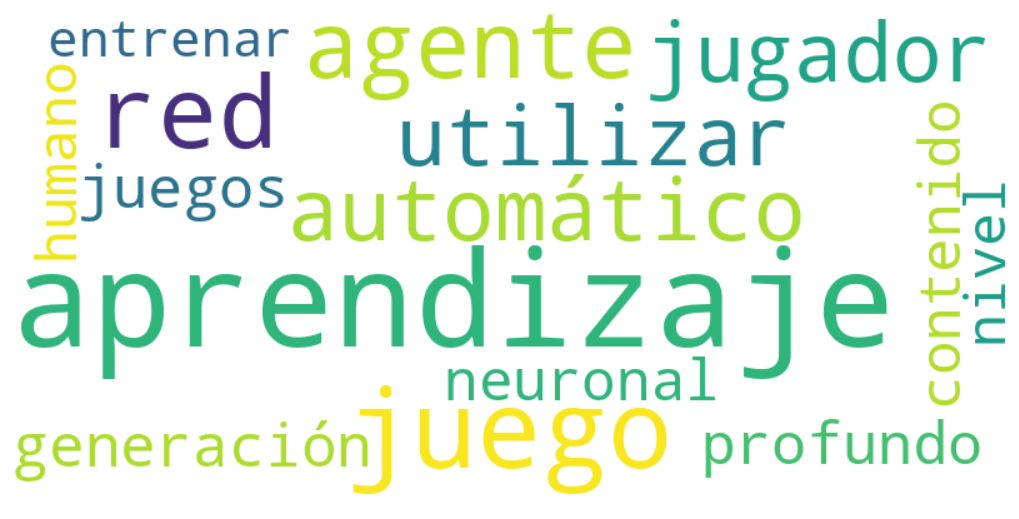

In [ ]:
plt.figure(figsize=(10, 5)) # Tamaño de la figura donde se mostrará
plt.imshow(wordcloud_generator, interpolation='bilinear') # Mostrar la imagen generada
plt.axis("off") # No mostrar los ejes X e Y
plt.tight_layout(pad=0) # Ajustar para que no haya bordes extra
plt.show() # <-- ¡Mostrar la ventana con la nube!